In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import warnings
warnings.filterwarnings("ignore")

In [0]:
from datetime import datetime
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style('whitegrid')
import os

## REFORMATTING AND CONCATINATING RAW DATA FILES:

In [0]:
start = datetime.now()
if not os.path.isfile('gdrive/My Drive/netflix_colab/data/data.csv'):
    
    # Create 'data.csv'
    data  = open('gdrive/My Drive/netflix_colab/data/data.csv', mode='w')
    row   = []
    files = ['gdrive/My Drive/netflix_colab/data/combined_data_1.txt',
             'gdrive/My Drive/netflix_colab/data/combined_data_2.txt', 
             'gdrive/My Drive/netflix_colab/data/combined_data_3.txt', 
             'gdrive/My Drive/netflix_colab/data/combined_data_4.txt']
    
    # read from four files and append each rating to a global file 'train.csv'
    for file in files:
        print("Reading ratings from {}...".format(file))
        
        with open(file) as f:
            
            for line in f: 
                line = line.strip()
                if line.endswith(':'):
                    
                    # All below are ratings for this movie, until another movie appears.
                    movie_id = line.replace(':', '')
                else:
                    row = [x for x in line.split(',')]
                    # Append movie_id to row
                    row.insert(0, movie_id)
                     # store them in one big file('data.csv')
                    data.write(','.join(row))
                    data.write('\n')
                    
        print("Done.\n")

print('Time taken :', datetime.now() - start)

Time taken : 0:00:00.013544


In [0]:
print("creating the dataframe from data.csv file..")

df = pd.read_csv('gdrive/My Drive/netflix_colab/data/data.csv', sep=',', names=['movie', 'user','rating','date'])

df.date = pd.to_datetime(df.date)
print('Done.\n')

# we are arranging the ratings according to time.
print('Sorting the dataframe by date..')
df.sort_values(by='date', inplace=True)
print('Done..')

creating the dataframe from data.csv file..
Done.

Sorting the dataframe by date..
Done..


In [0]:
df.head()


,movie,user,rating,date
9056171,1798,510180,5,1999-11-11
96212725,17064,510180,2,1999-11-11
84752845,15105,510180,4,1999-11-11
68629646,12470,510180,2,1999-11-11
48101611,8651,510180,2,1999-11-11


In [0]:
path = 'gdrive/My Drive/netflix_colab/data/'

## CHECK & REMOVE Nan & Duplicates

In [0]:
# just to make sure that all Nan containing rows are deleted..
print("No of Nan values in our dataframe : ", sum(df.isnull().any()))

No of Nan values in our dataframe :  0


In [0]:
dup_bool = df.duplicated(['movie','user','rating','date'])
dups = sum(dup_bool) # by considering all columns..( including timestamp)
print("There are {} duplicate rating entries in the data..".format(dups))

There are 0 duplicate rating entries in the data..


## DATA OVERVIEW:

In [0]:
df.describe()

,movie,user,rating
count,1.004788e+08,1.004788e+08,1.004788e+08
mean,9.070768e+03,1.322488e+06,3.604306e+00
std,5.131810e+03,7.645367e+05,1.085213e+00
min,1.000000e+00,6.000000e+00,1.000000e+00
25%,4.677000e+03,6.611980e+05,3.000000e+00
50%,9.051000e+03,1.319012e+06,4.000000e+00
75%,1.363400e+04,1.984455e+06,4.000000e+00
max,1.776900e+04,2.649429e+06,5.000000e+00


In [0]:
print("Total no of ratings :", df.shape[0])
print("Total No of Users   :", len(np.unique(df.user)))
print("Total No of movies  :", len(np.unique(df.movie)))

Total no of ratings : 100478811
Total No of Users   : 480189
Total No of movies  : 17769


# TRAIN & TEST SETS:

In [0]:
if not os.path.isfile(path + 'train.csv'):
    df.iloc[:int(df.shape[0]*0.80), :].to_csv(path + 'train.csv', index=False)

if not os.path.isfile(path + 'test.csv'):
    df.iloc[int(df.shape[0]*0.80):, :].to_csv(path + 'test.csv', index=False)

In [0]:
df_train = pd.read_csv(path + 'train.csv', parse_dates=['date'])
df_train.head()

,movie,user,rating,date
0,10341,510180,4,1999-11-11
1,1798,510180,5,1999-11-11
2,10774,510180,3,1999-11-11
3,8651,510180,2,1999-11-11
4,14660,510180,2,1999-11-11


## RATINGS DISTRIBUTION:

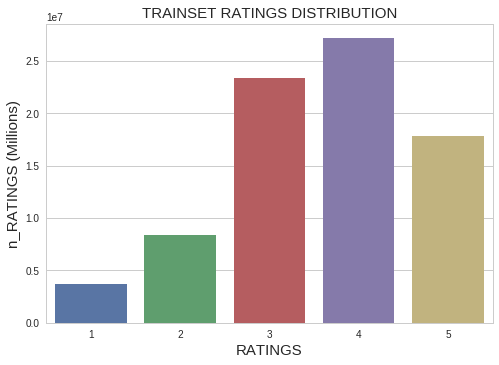

In [0]:
fig, ax = plt.subplots()
plt.title('TRAINSET RATINGS DISTRIBUTION', fontsize=15)
sns.countplot(df_train.rating)
ax.set_xlabel('RATINGS', fontsize=15)
ax.set_ylabel('n_RATINGS (Millions)', fontsize=15)

plt.show()

### RATINGS ARE GENERALLY GOOD. ie: 3 AND ABOVE.

## YEARLY RATINGS:

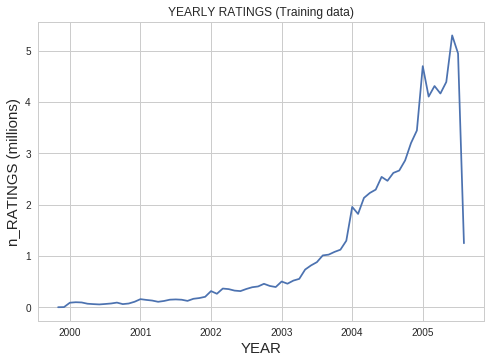

In [0]:
ax = (df_train.resample('m', on='date')['rating'].count()/1e6).plot()
ax.set_title('YEARLY RATINGS (Training data)')
plt.xlabel('YEAR', fontsize=15)
plt.ylabel('n_RATINGS (millions)', fontsize=15)
plt.show()

### THE PLOT IS REFLECTIVE OF THE GROWTH IN NETFLIX'S CUSTOMER BASE.

## n_RATINGS PER USER:

In [0]:
no_of_rated_movies_per_user = df_train.groupby(by='user')['rating'].count().sort_values(ascending=False)

no_of_rated_movies_per_user.head()

user
305344     17112
2439493    15896
387418     15402
1639792     9767
1461435     9447
Name: rating, dtype: int64

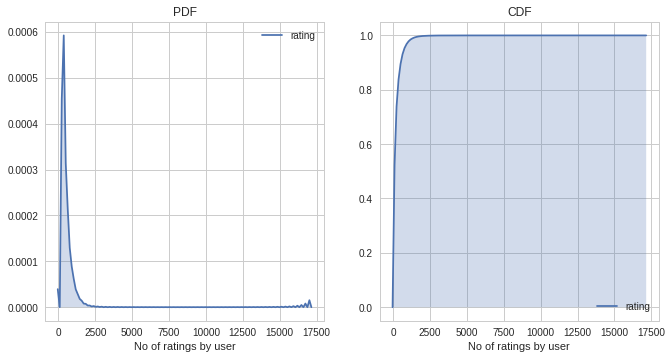

In [0]:
fig = plt.figure(figsize=plt.figaspect(.5))

ax1 = plt.subplot(121)
sns.kdeplot(no_of_rated_movies_per_user, shade=True, ax=ax1)
plt.xlabel('No of ratings by user')
plt.title("PDF")

ax2 = plt.subplot(122)
sns.kdeplot(no_of_rated_movies_per_user, shade=True, cumulative=True,ax=ax2)
plt.xlabel('No of ratings by user')
plt.title('CDF')

plt.show()

In [0]:
no_of_rated_movies_per_user.describe()

count    405041.000000
mean        198.459921
std         290.793238
min           1.000000
25%          34.000000
50%          89.000000
75%         245.000000
max       17112.000000
Name: rating, dtype: float64

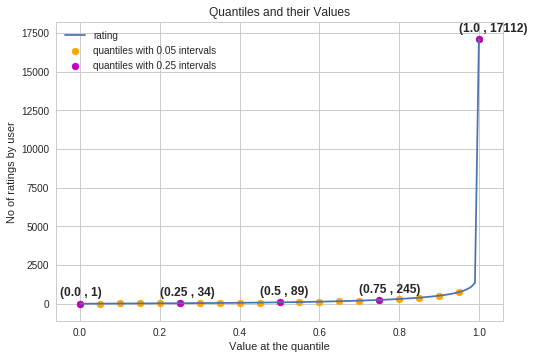

In [0]:
quantiles = no_of_rated_movies_per_user.quantile(np.arange(0,1.01,0.01), interpolation='higher')

plt.title("Quantiles and their Values")
quantiles.plot()
# quantiles with 0.05 difference
plt.scatter(x=quantiles.index[::5], y=quantiles.values[::5], c='orange', label="quantiles with 0.05 intervals")
# quantiles with 0.25 difference
plt.scatter(x=quantiles.index[::25], y=quantiles.values[::25], c='m', label = "quantiles with 0.25 intervals")
plt.ylabel('No of ratings by user')
plt.xlabel('Value at the quantile')
plt.legend(loc='best')

# annotate the 25th, 50th, 75th and 100th percentile values....
for x,y in zip(quantiles.index[::25], quantiles[::25]):
    plt.annotate(s="({} , {})".format(x,y), xy=(x,y), xytext=(x-0.05, y+500)
                ,fontweight='bold')


plt.show()

### AVERAGE NUMBER OF RATINGS PER USER IS AROUND 198.
### MAXIMUM NUMBER OF RATINGS BY AN USER IS 17111.
### 75% OF THE USERS  RATE <= 245 MOVIES

## n_RATINGS PER MOVIE:

In [0]:
no_of_ratings_per_movie = df_train.groupby(by='movie')['rating'].count().sort_values(ascending=False)

no_of_ratings_per_movie.describe()

count     17424.000000
mean       4613.430039
std       13736.048971
min           1.000000
25%         147.000000
50%         435.000000
75%        2188.500000
max      179684.000000
Name: rating, dtype: float64

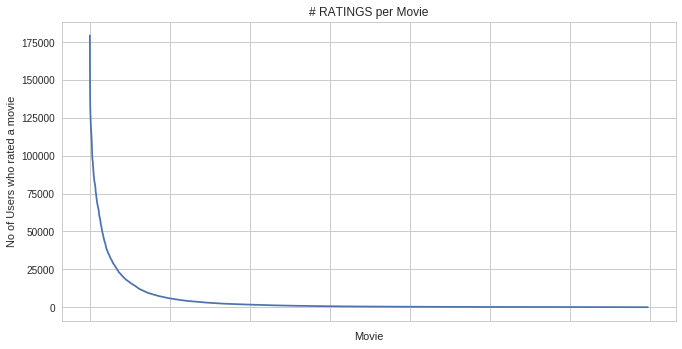

In [0]:
no_of_ratings_per_movie = df_train.groupby(by='movie')['rating'].count().sort_values(ascending=False)

fig = plt.figure(figsize=plt.figaspect(.5))
ax = plt.gca()
plt.plot(no_of_ratings_per_movie.values)
plt.title('# RATINGS per Movie')
plt.xlabel('Movie')
plt.ylabel('No of Users who rated a movie')
ax.set_xticklabels([])

plt.show()

### MAX n_RATINGS RECEIVED BY A MOVIES = 179684
### AVG n_RATINGS RECEIVED BY A MOVIE = AROUND 4613
### 75% OF THE MOVIES HAVE RATINGS <= 2188




## n-RATINGS/DAY_OF_THE_WEEK:

In [0]:
df_train['day_of_week'] = df_train.date.dt.weekday_name

df_train.tail()

,movie,user,rating,date,day_of_week
80383043,15634,965381,5,2005-08-08,Monday
80383044,15182,952063,2,2005-08-08,Monday
80383045,2329,192002,4,2005-08-08,Monday
80383046,5563,2260738,4,2005-08-08,Monday
80383047,9340,971819,4,2005-08-08,Monday


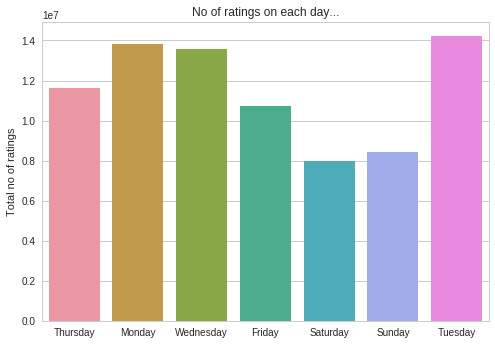

In [0]:
fig, ax = plt.subplots()
sns.countplot(x='day_of_week', data=df_train, ax=ax)
plt.title('No of ratings on each day...')
plt.ylabel('Total no of ratings')
plt.xlabel('')
plt.show()

## VALUE OF RATINGS PER DAY_OF_THE_WEEK:

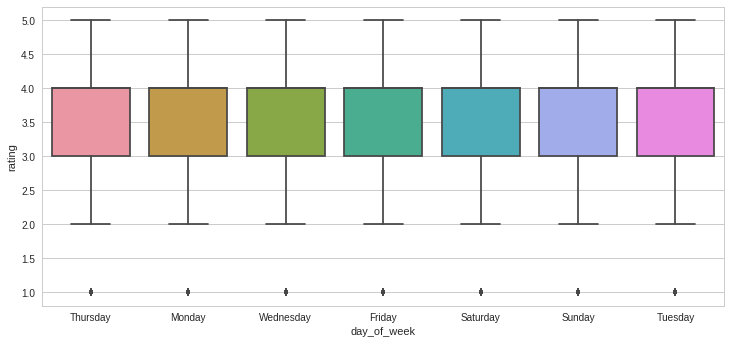

In [0]:
fig = plt.figure(figsize=plt.figaspect(.45))
sns.boxplot(y='rating', x='day_of_week', data=df_train)
plt.show()

### MOST OF THE RATING ACTIVITY TAKES PLACE ON MONDAYS,  TUESDAYS & WEDNESDAYS.
### THE AVG RATINGS GENERALLY LIE WITHIN THE SAME RANGE(3 - 4) IRRESPECTIVE OF WHAT DAY IT IS.